# Modelagem Estatística

### Banco de 2021

Para a modelagem estatística, irei utilizar uma árvore de decisão pois acredito ser a melhor opção para visualizar quais variáveis são mais e menos importantes na hora de determinar o óbito.

### Transformação das variáveis de idade e tempo de alta e óbito em categóricas

No caso deste problema, há apenas 2 variáveis que não são categóricas, idade e tempo de alta ou óbito. Isso faz com que a árvore de decisão seja enviesada pois estas duas variáveis possibilitam infinitas quebras na árvore, a tornando muito importantes quando analisamos o feature importances e o SHAP. Desse modo, vou transformá-las em categóricas utilizando o pd.cut e ver como ficará o modelo.

### Remoção de algumas colunas que já foram mostradas que não são úteis para as predições

Através da árvore de decisão de profundidade 7 é possível observar que muitas colunas acabam não sendo utilizadas para prever o óbito. Além disso, há algumas colunas que são redundantes, por mais que não estejam correlacionadas, como diagnóstico Outros e os exames positivos para outros vírus.

### Remoção de nulos e ignorados de colunas em que estes não são predominantes

Vou começar pelas comorbidades e, se tudo der certo, passar para os sintomas e então para outras variáveis como diagnóstico e suporte ventilatório.

Caso uma coluna elimine muitos registros ao editar Nulo e Ignorado, vou excluir a coluna ou mantê-la como está

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('SRAG_2020_2021_idade_tempo_cat.csv', parse_dates=['DT_NOTIFIC'])

df = df[df['tempo_alta_obito_final'] >= 0]

In [3]:
df['idade1'].value_counts().sort_index()

(-0.001, 39.0]    502254
(39.0, 52.0]      447026
(52.0, 63.0]      478908
(63.0, 75.0]      497105
(75.0, 121.0]     444562
Name: idade1, dtype: int64

In [4]:
df['tempo_alta_obito_final1'].value_counts().sort_index()

(-0.001, 14.0]    506975
(14.0, 36.0]      449796
(162.0, 703.0]    469133
(36.0, 85.0]      466670
(85.0, 162.0]     477281
Name: tempo_alta_obito_final1, dtype: int64

In [5]:
for i in df.columns:
    print(df[i].value_counts())
    print()

2021-03-15    11811
2021-03-22    11675
2021-03-29    11378
2021-05-04    10878
2021-03-30    10483
              ...  
2020-01-19       15
2019-12-31        9
2020-01-01        8
2019-12-30        5
2019-12-29        1
Name: DT_NOTIFIC, Length: 701, dtype: int64

7.0      39625
10.0     39320
8.0      38994
9.0      38800
15.0     38272
         ...  
664.0        1
624.0        1
591.0        1
677.0        1
564.0        1
Name: tempo_alta_obito_final, Length: 688, dtype: int64

Sim         1291688
Nao          692425
Nulo         353458
Ignorado      32284
Name: febre, dtype: int64

Sim         1589378
Nao          472154
Nulo         281562
Ignorado      26761
Name: tosse, dtype: int64

Sim         1647458
Nao          434207
Nulo         265003
Ignorado      23187
Name: dispneia, dtype: int64

Nao         1366301
Nulo         658700
Sim          294607
Ignorado      50247
Name: diarreia, dtype: int64

Nao         1427828
Nulo         683614
Sim          206308
Ignorado      52105

In [5]:
remove_null_ig_num = ['hematologi', 'cardiopati', 'asma', 'diabetes', 'pneumopati', 'renal', 'imunodepre', 'hepatica', 
                      'neurologic', 'obesidade', 'puerpera', 'sind_down', 'febre', 'tosse', 'dispneia', 'diarreia', 'vomito', 
                      'garganta', 'desc_resp', 'saturacao', 'dor_abd', 'fadiga', 'perd_olft', 'perd_pala', 'uti', 
                      'vacina_gripe', 'antiviral']

df = df[
     # Morbidades
     (df.cardiopati     != 'Nulo') & (df.cardiopati     != 'Ignorado') &
     (df.hematologi     != 'Nulo') & (df.hematologi     != 'Ignorado') &
     (df.asma           != 'Nulo') & (df.asma           != 'Ignorado') &
     (df.diabetes       != 'Nulo') & (df.diabetes       != 'Ignorado') &
     (df.pneumopati     != 'Nulo') & (df.pneumopati     != 'Ignorado') &
     (df.renal          != 'Nulo') & (df.renal          != 'Ignorado') &
     (df.imunodepre     != 'Nulo') & (df.imunodepre     != 'Ignorado') &
     (df.hepatica       != 'Nulo') & (df.hepatica       != 'Ignorado') &
     (df.neurologic     != 'Nulo') & (df.neurologic     != 'Ignorado') &
     (df.obesidade      != 'Nulo') & (df.obesidade      != 'Ignorado') &
     (df.puerpera       != 'Nulo') & (df.puerpera       != 'Ignorado') &
     (df.sind_down      != 'Nulo') & (df.sind_down      != 'Ignorado') &

     # Sintomas
     (df.febre          != 'Nulo') & (df.febre          != 'Ignorado') &
     (df.tosse          != 'Nulo') & (df.tosse          != 'Ignorado') &
     (df.dispneia       != 'Nulo') & (df.dispneia       != 'Ignorado') &
     (df.diarreia       != 'Nulo') & (df.diarreia       != 'Ignorado') &
     (df.vomito         != 'Nulo') & (df.vomito         != 'Ignorado') &
     (df.garganta       != 'Nulo') & (df.garganta       != 'Ignorado') &
     (df.desc_resp      != 'Nulo') & (df.desc_resp      != 'Ignorado') &
     (df.saturacao      != 'Nulo') & (df.saturacao      != 'Ignorado') &
     (df.dor_abd        != 'Nulo') & (df.dor_abd        != 'Ignorado') & # Tirou muitos
     (df.fadiga         != 'Nulo') & (df.fadiga         != 'Ignorado') &
     (df.perd_olft      != 'Nulo') & (df.perd_olft      != 'Ignorado') &
     (df.perd_pala      != 'Nulo') & (df.perd_pala      != 'Ignorado') &
     
     # Outras
     (df.uti            != 'Nulo') & (df.uti            != 'Ignorado') &
     (df.suporte_vent   != 'Nulo') & (df.suporte_vent   != 'Ignorado') &
     (df.vacina_gripe   != 'Nulo') & (df.vacina_gripe   != 'Ignorado') & # Tirou muitos
     (df.antiviral      != 'Nulo') & (df.antiviral      != 'Ignorado') &
     (df.vacina_covid19 != 'Nulo') & (df.vacina_covid19 != 'Ignorado')
    ].reset_index(drop=True).copy()

In [6]:
for i in remove_null_ig_num:
    
    df.loc[df[i] == 'Sim', i] = 1
    df.loc[df[i] == 'Nao', i] = 0
    
    df[i] = df[i].astype(int)

In [7]:
pd.crosstab(df.vacina_covid19, df.EVOLUCAO, normalize = 'index')

EVOLUCAO,0,1
vacina_covid19,,
Nao,0.651881,0.348119
Nao-disponivel,0.714445,0.285555
Sim,0.669603,0.330397


In [9]:
df.to_csv('SRAG_2020_2021_semignonull.csv', index = False)

In [8]:
df.shape

(247722, 53)

## Seleção das variáveis numéricas e categóricas

Também irei retirar algumas variáveis da análise, como Raça e Estado.

In [9]:
delete_vars = ['raca', 'SG_UF_NOT', 'EVOLUCAO', 'DT_NOTIFIC', 'idade', 'tempo_alta_obito_final', 'positivo_vsr', 
               'positivo_para1', 'positivo_para2', 'positivo_para3', 'positivo_para4', 'positivo_adeno', 'positivo_sars2', 
               'positivo_influenza', 'positivo_metap', 'positivo_boca', 'positivo_rino']
num_vars = []
dummy_vars = ['gravidez', 'mae_amamenta', 'mae_vacinada_gripe', 'hematologi', 'cardiopati', 'asma', 'diabetes', 'pneumopati', 
              'renal', 'imunodepre', 'hepatica', 'neurologic', 'obesidade', 'puerpera', 'sind_down', 'febre', 'tosse', 
              'dispneia', 'diarreia', 'vomito', 'garganta', 'desc_resp', 'saturacao', 'dor_abd', 'fadiga', 'perd_olft', 
              'perd_pala', 'uti', 'vacina_gripe', 'antiviral']

cat_vars = [i for i in df.columns if (i not in delete_vars) and (i not in num_vars) and (i not in dummy_vars)]

model_vars = cat_vars + num_vars + dummy_vars

In [10]:
cat_vars

['CS_SEXO',
 'diagnostico',
 'suporte_vent',
 'vacina_covid19',
 'idade1',
 'tempo_alta_obito_final1']

In [11]:
len(model_vars)

36

In [12]:
model_vars

['CS_SEXO',
 'diagnostico',
 'suporte_vent',
 'vacina_covid19',
 'idade1',
 'tempo_alta_obito_final1',
 'gravidez',
 'mae_amamenta',
 'mae_vacinada_gripe',
 'hematologi',
 'cardiopati',
 'asma',
 'diabetes',
 'pneumopati',
 'renal',
 'imunodepre',
 'hepatica',
 'neurologic',
 'obesidade',
 'puerpera',
 'sind_down',
 'febre',
 'tosse',
 'dispneia',
 'diarreia',
 'vomito',
 'garganta',
 'desc_resp',
 'saturacao',
 'dor_abd',
 'fadiga',
 'perd_olft',
 'perd_pala',
 'uti',
 'vacina_gripe',
 'antiviral']

### Separando em treino e teste (OOT)

O banco de teste será OOT (Out of time). Pode-se ver pela variável DT_NOTIFIC que o banco vai de 29/12/2019 até 09/12/2021 (provável erro). Vou utilizar como treino os casos do início até 31 de junho de 2021. A partir de 01 de julho de 2021 será utilizado como teste (OOT).

Essa divisão traz uma proporção de, aproximadamente 19,7% para teste

In [12]:
df[['DT_NOTIFIC']].describe(datetime_is_numeric=True)

,DT_NOTIFIC
count,247722
mean,2021-02-04 19:57:00.379296
min,2020-01-04 00:00:00
25%,2020-09-25 00:00:00
50%,2021-03-06 00:00:00
75%,2021-06-14 00:00:00
max,2021-12-11 00:00:00


In [13]:
data_corte = pd.to_datetime('2021-07-01')

df_train = df[df['DT_NOTIFIC'] <= data_corte].reset_index().copy()
df_test = df[df['DT_NOTIFIC'] >= data_corte].reset_index().copy()

In [14]:
df_train.shape, df_test.shape

((197189, 54), (50565, 54))

In [15]:
X_train = df_train[model_vars].copy()
y_train = df_train['EVOLUCAO'].copy()

X_test = df_test[model_vars].copy()
y_test = df_test['EVOLUCAO'].copy()

In [16]:
y_train.value_counts(normalize=True)

0    0.679627
1    0.320373
Name: EVOLUCAO, dtype: float64

In [17]:
y_test.value_counts(normalize=True)

0    0.695956
1    0.304044
Name: EVOLUCAO, dtype: float64

A proporção entre 0 e 1 de teste e treino é próxima e se mantém, também, do dataset sem tratamento.

## Modelagem - Árvore de decisão

In [18]:
from sklearn.pipeline import Pipeline
from feature_engine.encoding import OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

Para não ter que aplicar em cada loop a transformação das colunas categóricas em dummy, vou fazer o processo apenas 1 vez e aplicar no modelo

In [19]:
onehot = OneHotEncoder()

In [20]:
X_train_transf = onehot.fit_transform(X_train)

X_test_transf = onehot.transform(X_test)

In [21]:
X_train_transf.shape, X_test_transf.shape

((197189, 52), (50565, 52))

### Baseline - Modelo sem ajuste de hiperparâmetros

In [51]:
dt = Pipeline(steps=[
    ('dt', DecisionTreeClassifier(random_state=42))
])

In [52]:
dt.fit(X_train_transf, y_train)

Pipeline(steps=[('dt', DecisionTreeClassifier(random_state=42))])

## Avaliação do modelo

### Acurácia

In [53]:
y_pred_train = dt.predict(X_train_transf)
y_pred_test = dt.predict(X_test_transf)
from sklearn.metrics import accuracy_score

print('Acurácia Treino:', accuracy_score(y_train, y_pred_train))
print('Acurácia Teste:', accuracy_score(y_test, y_pred_test))

Acurácia Treino: 0.969029712610744
Acurácia Teste: 0.706733906852566


### AUROC

In [54]:
from sklearn.metrics import roc_auc_score

y_proba = dt.predict_proba(X_train_transf)[:, 1]

y_proba_test = dt.predict_proba(X_test_transf)[:, 1]


print('AUC Treino:', roc_auc_score(y_train, y_proba))
print('AUC Teste:', roc_auc_score(y_test, y_proba_test))

AUC Treino: 0.9975693266300268
AUC Teste: 0.6702399092019227


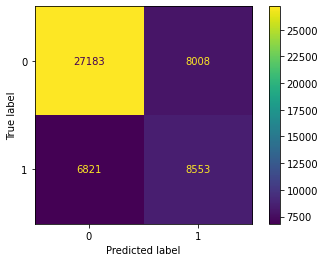

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Classification Report

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test, target_names=['Alta', 'Obito']))

              precision    recall  f1-score   support

        Alta       0.80      0.77      0.79     35191
       Obito       0.52      0.56      0.54     15374

    accuracy                           0.71     50565
   macro avg       0.66      0.66      0.66     50565
weighted avg       0.71      0.71      0.71     50565



## Feature Importances

Entendendo quais são as características que não podem faltar na triagem de um paciente com suspeita de SRAG

In [57]:
pd.set_option('display.max_rows', len(X_train_transf.columns))

feature_importances_df = pd.DataFrame({
    'features': X_train_transf.columns,
    'importances': dt.steps[-1][1].feature_importances_
}).sort_values(by='importances', ascending=False)

feature_importances_df

,features,importances
38,suporte_vent_Invasivo,0.224077
15,febre,0.041640
4,cardiopati,0.037687
16,tosse,0.033649
6,diabetes,0.030677
27,uti,0.030067
24,fadiga,0.029957
44,"idade1_(75.0, 121.0]",0.029923
28,vacina_gripe,0.029908
20,garganta,0.026935


In [58]:
pd.reset_option('display.max_rows')

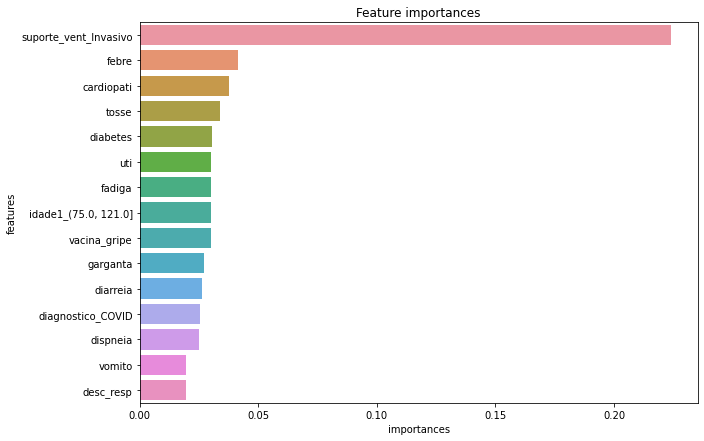

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.title("Feature importances")
sns.barplot(data = feature_importances_df[:15], x = 'importances', y = 'features')
plt.show()

**OBSERVAÇÃO**

Observa-se uma grande mudança no feature importance em  comparação com o modelo sem alterar as variáveis de idade e tempo de alta. Antes, estas duas variáveis tinham uma importância muito alta pois traziam o viés de serem numéricas. Este modelo é melhor pois remove o viés numérico destas variáveis, assim conseguimos analisar quais faixas desempenham a maior importância no modelo

In [60]:
# import shap

# explainer = shap.Explainer(dt.steps[-1][1])
# shap_values = explainer(X_test_transf)

# shap.plots.beeswarm(shap_values[:, :, 1], max_display = 20)

# O SHAP para o modelo baseline demora demais pois a árvore não tem profundidade limitada

### Modelo com ajuste de hiperparâmetros

Vou reavaliar novamente a questão da profundidade e do min samples leaf

In [61]:
%%time

profundidade    = []
acuracia_treino = []
acuracia_teste  = []
auc_treino      = []
auc_teste       = []

for depth in range(1, 31):
    dt = Pipeline(steps=[
        ('dt', DecisionTreeClassifier(random_state=42, max_depth=depth))
    ])
    
    dt.fit(X_train_transf, y_train)
    
    y_pred_train = dt.predict(X_train_transf)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    y_pred_test = dt.predict(X_test_transf)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    y_proba = dt.predict_proba(X_train_transf)[:, 1]
    train_auc = roc_auc_score(y_train, y_proba)
    y_proba_test = dt.predict_proba(X_test_transf)[:, 1]
    test_auc = roc_auc_score(y_test, y_proba_test)
    
    profundidade.append(depth)
    acuracia_treino.append(train_accuracy)
    acuracia_teste.append(test_accuracy)
    auc_treino.append(train_auc)
    auc_teste.append(test_auc)
    
    print('Profundidade:', depth)
    print('Acurácia Treino:', train_accuracy)
    print('Acurácia Teste:', test_accuracy)
    print('AUC Treino:', train_auc)
    print('AUC Teste:', test_auc)
    print('')

Profundidade: 1
Acurácia Treino: 0.7770818859064147
Acurácia Teste: 0.7920893898941956
AUC Treino: 0.6932887334818058
AUC Teste: 0.7042068955543862

Profundidade: 2
Acurácia Treino: 0.7770818859064147
Acurácia Teste: 0.7920893898941956
AUC Treino: 0.7453621114568627
AUC Teste: 0.7666629972834192

Profundidade: 3
Acurácia Treino: 0.7790495413030138
Acurácia Teste: 0.7944823494512014
AUC Treino: 0.7832223278717398
AUC Teste: 0.798005523146028

Profundidade: 4
Acurácia Treino: 0.7852872117613051
Acurácia Teste: 0.8011074854148126
AUC Treino: 0.803360362765742
AUC Teste: 0.816755330664675

Profundidade: 5
Acurácia Treino: 0.7875794288728073
Acurácia Teste: 0.8015030159201029
AUC Treino: 0.8133474502100934
AUC Teste: 0.8262204060809346

Profundidade: 6
Acurácia Treino: 0.7894000172423411
Acurácia Teste: 0.8020765351527737
AUC Treino: 0.8197488418979195
AUC Teste: 0.8305080736591143

Profundidade: 7
Acurácia Treino: 0.7900744970561239
Acurácia Teste: 0.8000593295757935
AUC Treino: 0.82344536

In [63]:
result_profundidade = pd.DataFrame(data = {
    'Profundidade': profundidade,
    'Acuracia_treino': acuracia_treino,
    'Acuracia_teste': acuracia_teste,
    'AUC_treino': auc_treino,
    'AUC_teste': auc_teste
})

result_profundidade

,Profundidade,Acuracia_treino,Acuracia_teste,AUC_treino,AUC_teste
0,1,0.777082,0.792089,0.693289,0.704207
1,2,0.777082,0.792089,0.745362,0.766663
2,3,0.779050,0.794482,0.783222,0.798006
3,4,0.785287,0.801107,0.803360,0.816755
4,5,0.787579,0.801503,0.813347,0.826220
5,6,0.789400,0.802077,0.819749,0.830508
6,7,0.790074,0.800059,0.823445,0.833162
7,8,0.791596,0.798932,0.827469,0.834986
8,9,0.793711,0.798952,0.831204,0.834839
9,10,0.796013,0.798734,0.835858,0.833460


In [64]:
result_profundidade.to_csv('resultados_loop_sem_ignull.csv', index = False)

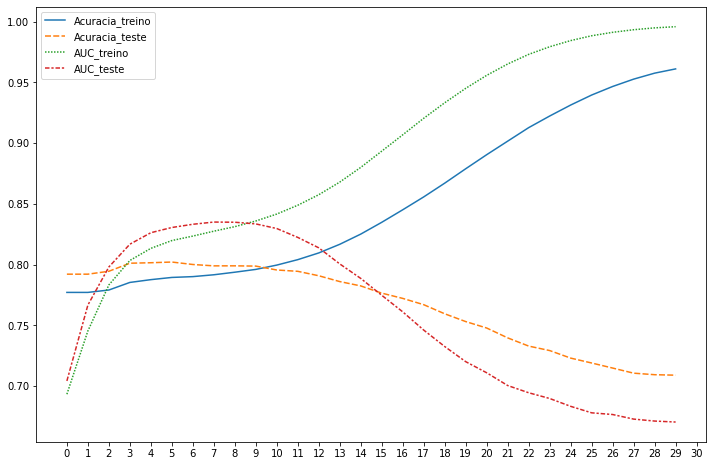

In [71]:
plt.figure(figsize = (12,8))
sns.lineplot(data = result_profundidade.iloc[:, 1:])
plt.xticks(range(0,31))
plt.show()

O ponto de profundidade 10 parece ser um ponto de interseção entre aumentar muito a acurácia de treino e diminuir a de teste (overfit). O mesmo é válido para os AUC de treino e de teste.

### Análise do min_samples_leaf

In [69]:
%%time

samp_leaf = [2, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 5000, 10000]

acuracia_treino = []
acuracia_teste  = []
auc_treino      = []
auc_teste       = []

for samples_leaf in samp_leaf:
    dt = Pipeline(steps=[
        ('dt', DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=samples_leaf))
    ])
    
    dt.fit(X_train_transf, y_train)
    
    y_pred_train = dt.predict(X_train_transf)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    y_pred_test = dt.predict(X_test_transf)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    y_proba = dt.predict_proba(X_train_transf)[:, 1]
    train_auc = roc_auc_score(y_train, y_proba)
    y_proba_test = dt.predict_proba(X_test_transf)[:, 1]
    test_auc = roc_auc_score(y_test, y_proba_test)

    acuracia_treino.append(train_accuracy)
    acuracia_teste.append(test_accuracy)
    auc_treino.append(train_auc)
    auc_teste.append(test_auc)
    
    print('min_samples_leaf:', samples_leaf)
    print('Acurácia Treino:', train_accuracy)
    print('Acurácia Teste:', test_accuracy)
    print('AUC Treino:', train_auc)
    print('AUC Teste:', test_auc)
    print('')

min_samples_leaf: 2
Acurácia Treino: 0.795774612174107
Acurácia Teste: 0.7988134084841293
AUC Treino: 0.8357603703294092
AUC Teste: 0.8332357305853931

min_samples_leaf: 10
Acurácia Treino: 0.7948059983061936
Acurácia Teste: 0.7993869277168002
AUC Treino: 0.8346211947208669
AUC Teste: 0.8348635410668308

min_samples_leaf: 20
Acurácia Treino: 0.7942836567962716
Acurácia Teste: 0.7994462572925937
AUC Treino: 0.8338561358592046
AUC Teste: 0.8359724314320656

min_samples_leaf: 30
Acurácia Treino: 0.7938728833758475
Acurácia Teste: 0.7999011173736774
AUC Treino: 0.8334232456648015
AUC Teste: 0.8361879652630797

min_samples_leaf: 40
Acurácia Treino: 0.7935128227233771
Acurácia Teste: 0.8001977652526451
AUC Treino: 0.8331113366431074
AUC Teste: 0.8368338320415598

min_samples_leaf: 50
Acurácia Treino: 0.7931071205797484
Acurácia Teste: 0.8007910610105804
AUC Treino: 0.8328001897639943
AUC Teste: 0.8370916336779212

min_samples_leaf: 100
Acurácia Treino: 0.7925898503466218
Acurácia Teste: 0.79

In [72]:
result_minleaf = pd.DataFrame(data = {
    'min_samples_leaf': samp_leaf,
    'Acuracia_treino': acuracia_treino,
    'Acuracia_teste': acuracia_teste,
    'AUC_treino': auc_treino,
    'AUC_teste': auc_teste
})

result_minleaf

,min_samples_leaf,Acuracia_treino,Acuracia_teste,AUC_treino,AUC_teste
0,2,0.795775,0.798813,0.835760,0.833236
1,10,0.794806,0.799387,0.834621,0.834864
2,20,0.794284,0.799446,0.833856,0.835972
3,30,0.793873,0.799901,0.833423,0.836188
4,40,0.793513,0.800198,0.833111,0.836834
5,50,0.793107,0.800791,0.832800,0.837092
6,100,0.792590,0.799684,0.831568,0.837607
7,200,0.791571,0.800316,0.830164,0.837249
8,300,0.791089,0.799862,0.829085,0.837080
9,400,0.790759,0.801088,0.828166,0.837338


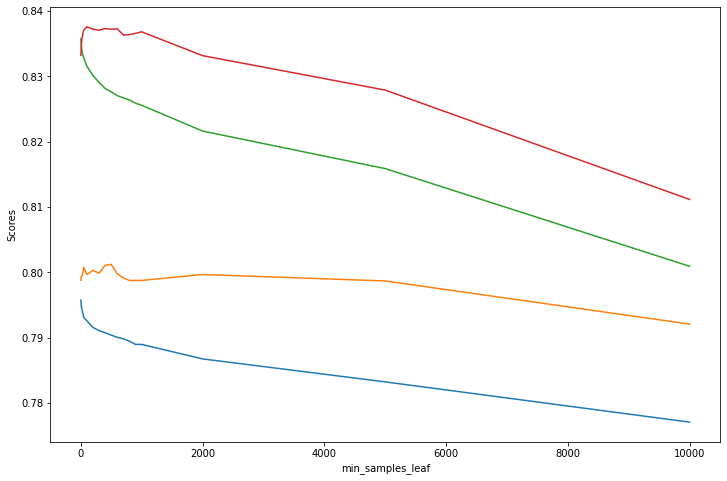

In [77]:
plt.figure(figsize = (12,8))
sns.lineplot(x = result_minleaf.min_samples_leaf, y = result_minleaf.Acuracia_treino)
sns.lineplot(x = result_minleaf.min_samples_leaf, y = result_minleaf.Acuracia_teste)
sns.lineplot(x = result_minleaf.min_samples_leaf, y = result_minleaf.AUC_treino)
sns.lineplot(x = result_minleaf.min_samples_leaf, y = result_minleaf.AUC_teste)
plt.ylabel('Scores')

plt.show()

min_samples_leaf = 100 parece uma boa ideia para tentar diminuir o tamanho da árvore

In [24]:
dt = Pipeline(steps=[
    ('dt', DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=100, class_weight = 'balanced'))
])

In [25]:
dt.fit(X_train_transf, y_train)

Pipeline(steps=[('dt',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=100,
                                        random_state=42))])

## Avaliação do modelo

### Acurácia

In [26]:
y_pred_train = dt.predict(X_train_transf)
y_pred_test = dt.predict(X_test_transf)
from sklearn.metrics import accuracy_score

print('Acurácia Treino:', accuracy_score(y_train, y_pred_train))
print('Acurácia Teste:', accuracy_score(y_test, y_pred_test))

Acurácia Treino: 0.759925756507716
Acurácia Teste: 0.7536636013052507


### AUROC

In [27]:
from sklearn.metrics import roc_auc_score

y_proba = dt.predict_proba(X_train_transf)[:, 1]

y_proba_test = dt.predict_proba(X_test_transf)[:, 1]


print('AUC Treino:', roc_auc_score(y_train, y_proba))
print('AUC Teste:', roc_auc_score(y_test, y_proba_test))

AUC Treino: 0.8317262284607744
AUC Teste: 0.8374452772117231


### Confusion Matrix

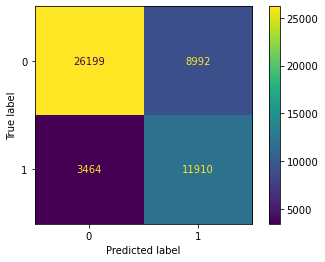

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Classification Report

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test, target_names=['Alta', 'Obito']))

              precision    recall  f1-score   support

        Alta       0.88      0.74      0.81     35191
       Obito       0.57      0.77      0.66     15374

    accuracy                           0.75     50565
   macro avg       0.73      0.76      0.73     50565
weighted avg       0.79      0.75      0.76     50565



## Feature Importances

Entendendo quais são as características que não podem faltar na triagem de um paciente com suspeita de SRAG

In [30]:
pd.set_option('display.max_rows', len(X_train_transf.columns))

feature_importances_df = pd.DataFrame({
    'features': X_train_transf.columns,
    'importances': dt.steps[-1][1].feature_importances_
}).sort_values(by='importances', ascending=False)

feature_importances_df

,features,importances
38,suporte_vent_Invasivo,0.573332
27,uti,0.104524
44,"idade1_(75.0, 121.0]",0.101841
33,diagnostico_COVID,0.064326
42,"idade1_(63.0, 75.0]",0.037505
43,"idade1_(-0.001, 39.0]",0.020628
22,saturacao,0.012787
21,desc_resp,0.009695
9,imunodepre,0.006820
11,neurologic,0.006682


In [31]:
pd.reset_option('display.max_rows')

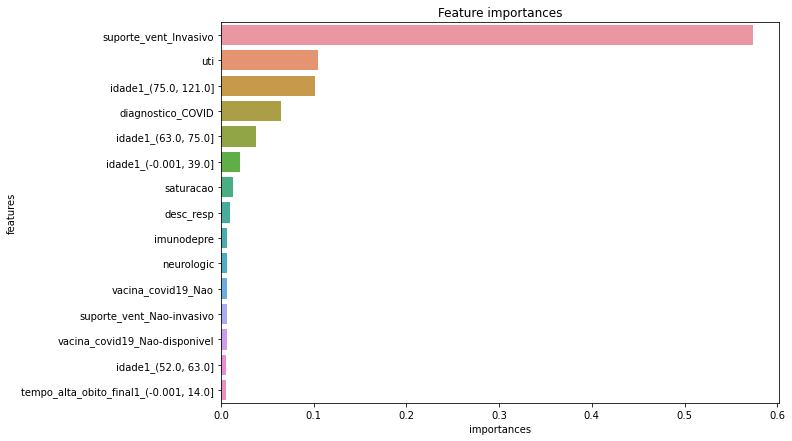

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.title("Feature importances")
sns.barplot(data = feature_importances_df[:15], x = 'importances', y = 'features')
plt.show()

In [39]:
plt.rcParams['figure.figsize'] = 35, 15

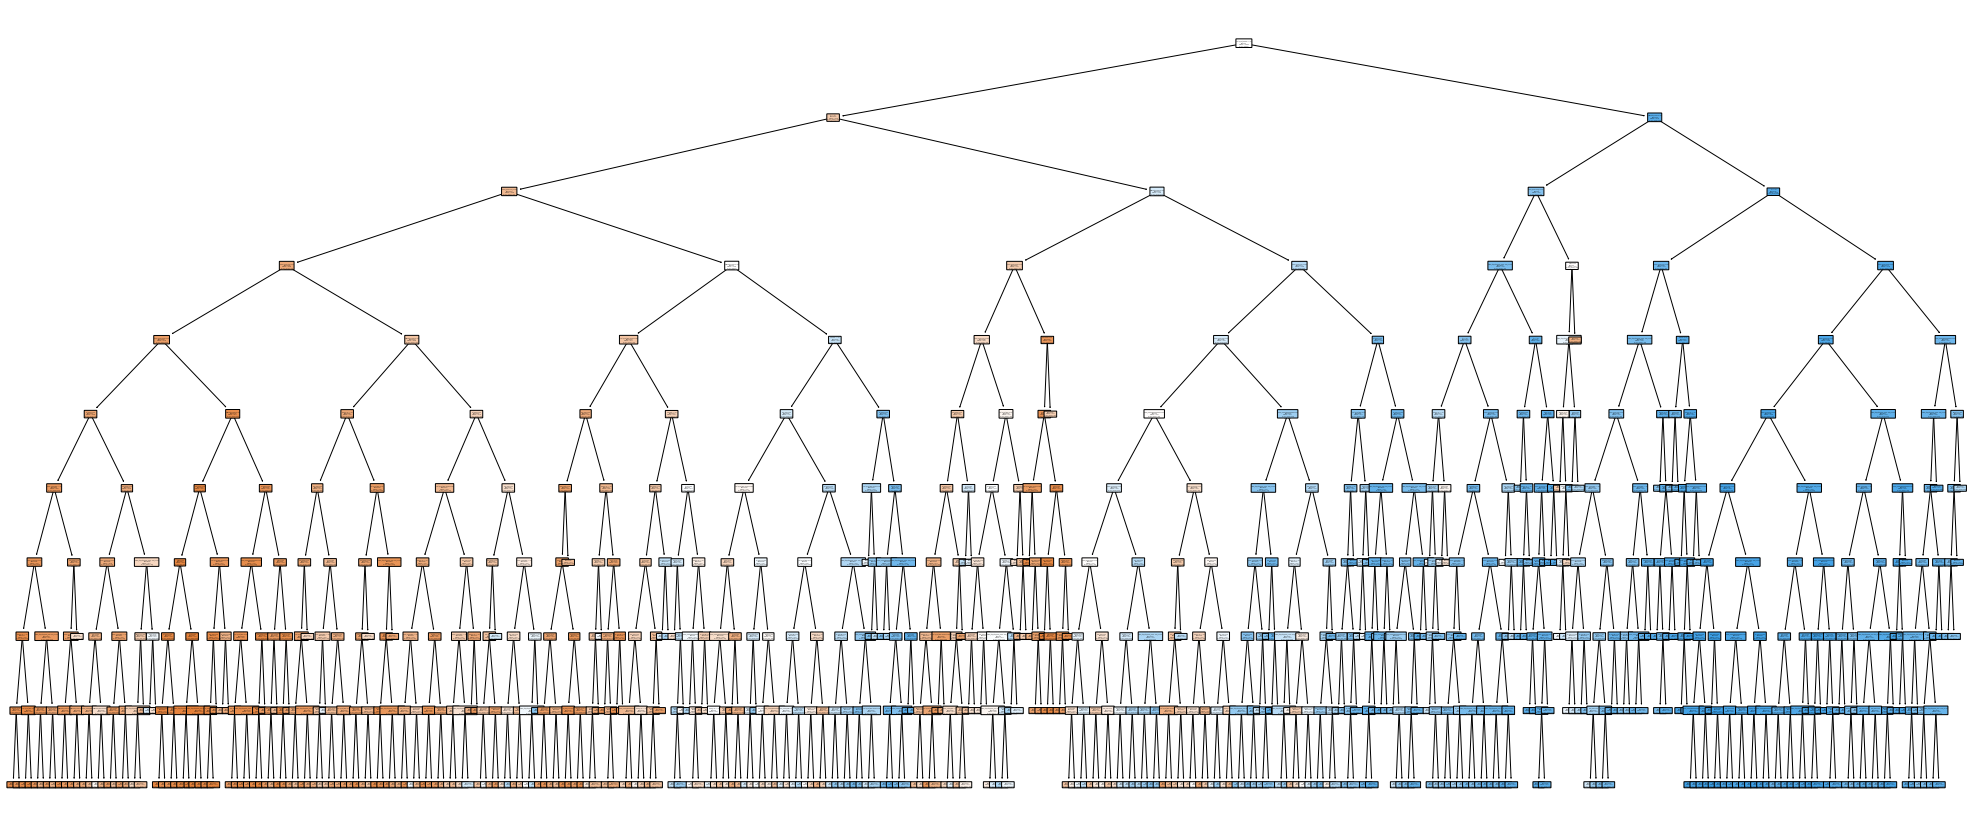

In [40]:
plot_tree(
    dt.steps[-1][1],
    feature_names=X_train_transf.columns,
    class_names=['Alta', 'Obito'],
    rounded=True,
    filled=True,
    proportion=True
);

plt.savefig('tree_10_100_semignull.pdf',format='pdf')

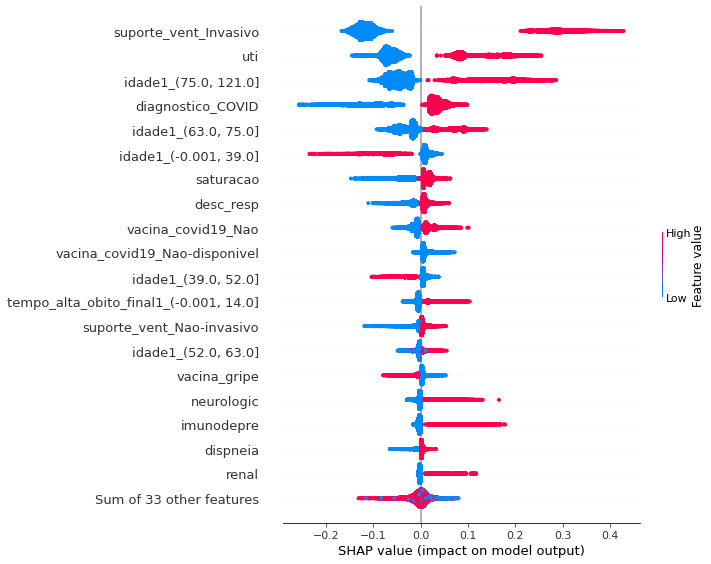

In [41]:
import shap

explainer = shap.Explainer(dt.steps[-1][1])
shap_values = explainer(X_test_transf)

shap.plots.beeswarm(shap_values[:, :, 1], max_display = 20) # 1 é o óbito e 0 a alta

Pode-se observar que o class_weight = 'balanced' faz diferença no modelo, melhorando os verdadeiros positivos, mas, em contra partida, piora os falsos positivos. Como estamos tratando de óbitos, um falso negativo é pior que um falso positivo, portanto podemos seguir desta forma.

## Alterando o ponto de corte do modelo

Para isso, vou utilizar o ROC através de uma função que irá retornar o ponto de corte ótimo que tem alta taxa de verdadeiros positivos e baixa taxa de falsos positivos

In [34]:
from sklearn.metrics import roc_curve, auc

def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
        
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

In [35]:
threshold = Find_Optimal_Cutoff(y_train, y_proba)[0]
threshold

0.4755588849182593

### Treino

In [93]:
train_cuttoff_pred = []
for i in y_proba:
    if i > threshold:
        i = 1
        train_cuttoff_pred.append(i)
    else:
        i = 0
        train_cuttoff_pred.append(i)

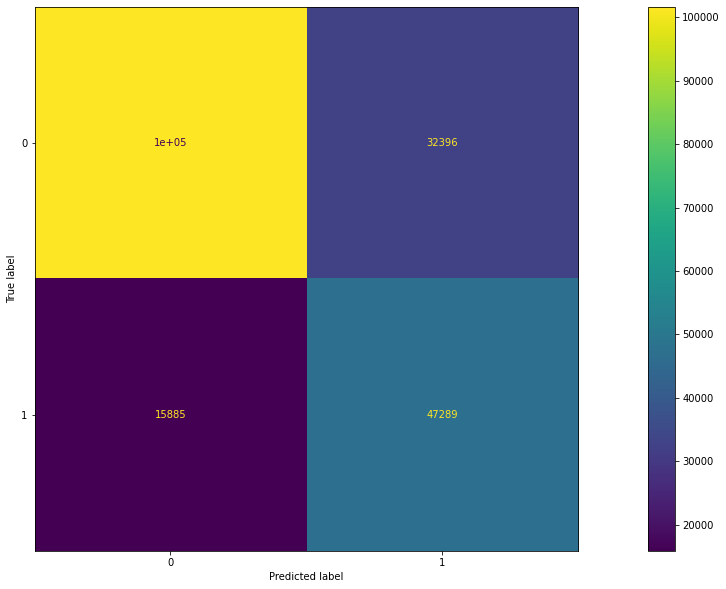

In [94]:
cm = confusion_matrix(y_train, train_cuttoff_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [95]:
print(classification_report(y_train, train_cuttoff_pred, target_names=['Alta', 'Obito']))

              precision    recall  f1-score   support

        Alta       0.86      0.76      0.81    134015
       Obito       0.59      0.75      0.66     63174

    accuracy                           0.76    197189
   macro avg       0.73      0.75      0.74    197189
weighted avg       0.78      0.76      0.76    197189



### Teste

In [96]:
# Add prediction probability to dataframe
test_cuttoff_pred = []

for i in y_proba_test:
    if i > threshold:
        i = 1
        test_cuttoff_pred.append(i)
    else:
        i = 0
        test_cuttoff_pred.append(i)

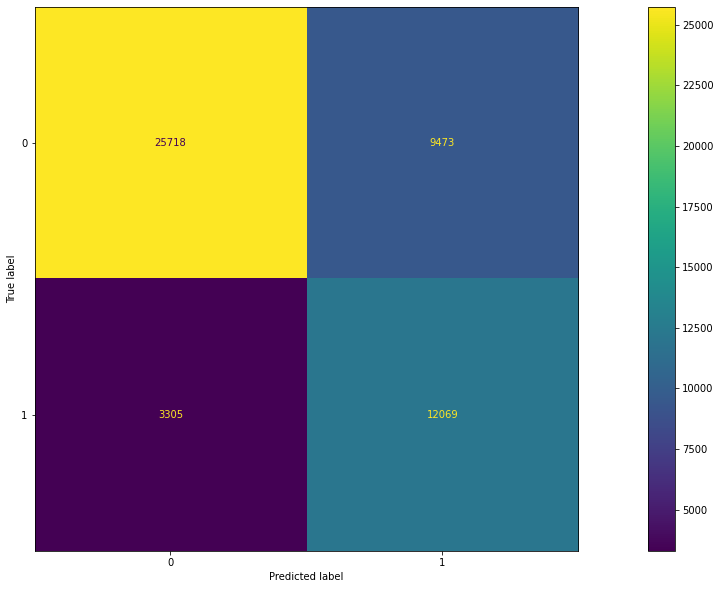

In [97]:
cm = confusion_matrix(y_test, test_cuttoff_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [98]:
print(classification_report(y_test, test_cuttoff_pred, target_names=['Alta', 'Obito']))

              precision    recall  f1-score   support

        Alta       0.89      0.73      0.80     35191
       Obito       0.56      0.79      0.65     15374

    accuracy                           0.75     50565
   macro avg       0.72      0.76      0.73     50565
weighted avg       0.79      0.75      0.76     50565



Não altera muita coisa, mas diminui a precisão mais ainda.

## Modelagem - Regressão Logística

No caso da regressão logística, é necessário aplicar o parâmetro drop_last = True ao dummificar as colunas

In [99]:
onehot = OneHotEncoder(drop_last = True)

In [100]:
X_train_transf = onehot.fit_transform(X_train)

X_test_transf = onehot.transform(X_test)

In [101]:
X_train_transf.shape, X_test_transf.shape

((197189, 46), (50565, 46))

### Modelo Baseline

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
lr = Pipeline(steps=[
    ('lr', LogisticRegression(random_state=42, max_iter = 1000))
])

In [104]:
lr.fit(X_train_transf, y_train)

Pipeline(steps=[('lr', LogisticRegression(max_iter=1000, random_state=42))])

## Avaliação do modelo

### Acurácia

In [105]:
y_pred_train = lr.predict(X_train_transf)
y_pred_test = lr.predict(X_test_transf)
from sklearn.metrics import accuracy_score

print('Acurácia Treino:', accuracy_score(y_train, y_pred_train))
print('Acurácia Teste:', accuracy_score(y_test, y_pred_test))

Acurácia Treino: 0.7910228258168559
Acurácia Teste: 0.8034015623454959


### AUROC

In [106]:
from sklearn.metrics import roc_auc_score

y_proba = lr.predict_proba(X_train_transf)[:, 1]

y_proba_test = lr.predict_proba(X_test_transf)[:, 1]


print('AUC Treino:', roc_auc_score(y_train, y_proba))
print('AUC Teste:', roc_auc_score(y_test, y_proba_test))

AUC Treino: 0.8304313229977492
AUC Teste: 0.8411578869360754


### Confusion Matrix

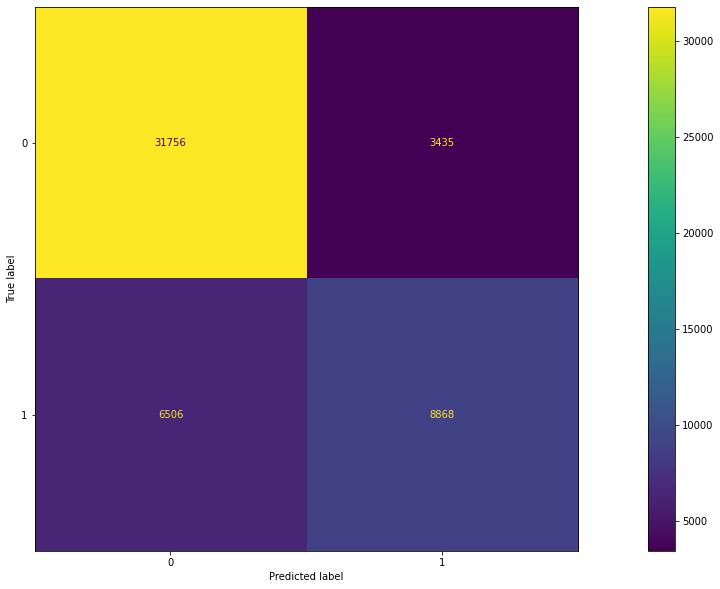

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Classification Report

In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test, target_names=['Alta', 'Obito']))

              precision    recall  f1-score   support

        Alta       0.83      0.90      0.86     35191
       Obito       0.72      0.58      0.64     15374

    accuracy                           0.80     50565
   macro avg       0.78      0.74      0.75     50565
weighted avg       0.80      0.80      0.80     50565



## Coeficientes

In [109]:
coefs = pd.DataFrame(data = {
    'Colunas': X_train_transf.columns,
    'Coeficientes': lr.steps[-1][1].coef_.ravel()
})

In [110]:
coefs_ordenado = coefs.reindex(coefs.Coeficientes.abs().sort_values(ascending = False).index).reset_index(drop=True)

In [111]:
coefs_ordenado.loc[0, :] = ['Intercepto', lr.steps[-1][1].intercept_]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [112]:
coefs_ordenado

,Colunas,Coeficientes
0,Intercepto,-1.376290
1,suporte_vent_Nao-invasivo,-1.763474
2,"idade1_(75.0, 121.0]",1.616284
3,uti,0.977798
4,"idade1_(63.0, 75.0]",0.969353
5,mae_amamenta,-0.841461
6,imunodepre,0.733152
7,diagnostico_COVID,0.620479
8,mae_vacinada_gripe,-0.575024
9,diagnostico_Outros,-0.511907


Observa-se que a regressão logística considera que suporte ventilatório, idade, diagnósticos e algumas comorbidades como mais importantes para o óbito (coefs positivos), porém, trata-se de um banco com muitas colunas, assim a regressão logística não é muito indicada, melhor permanecer com a árvore.

### Utilizando o class_weight = 'balanced'

In [113]:
lr = Pipeline(steps=[
    ('lr', LogisticRegression(random_state=42, max_iter = 1000, class_weight='balanced'))
])

In [114]:
lr.fit(X_train_transf, y_train)

Pipeline(steps=[('lr',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

## Avaliação do modelo

### Acurácia

In [115]:
y_pred_train = lr.predict(X_train_transf)
y_pred_test = lr.predict(X_test_transf)
from sklearn.metrics import accuracy_score

print('Acurácia Treino:', accuracy_score(y_train, y_pred_train))
print('Acurácia Teste:', accuracy_score(y_test, y_pred_test))

Acurácia Treino: 0.7659555046173975
Acurácia Teste: 0.7666370018787699


### AUROC

In [116]:
from sklearn.metrics import roc_auc_score

y_proba = lr.predict_proba(X_train_transf)[:, 1]

y_proba_test = lr.predict_proba(X_test_transf)[:, 1]


print('AUC Treino:', roc_auc_score(y_train, y_proba))
print('AUC Teste:', roc_auc_score(y_test, y_proba_test))

AUC Treino: 0.8305960715886569
AUC Teste: 0.8411914823370719


### Confusion Matrix

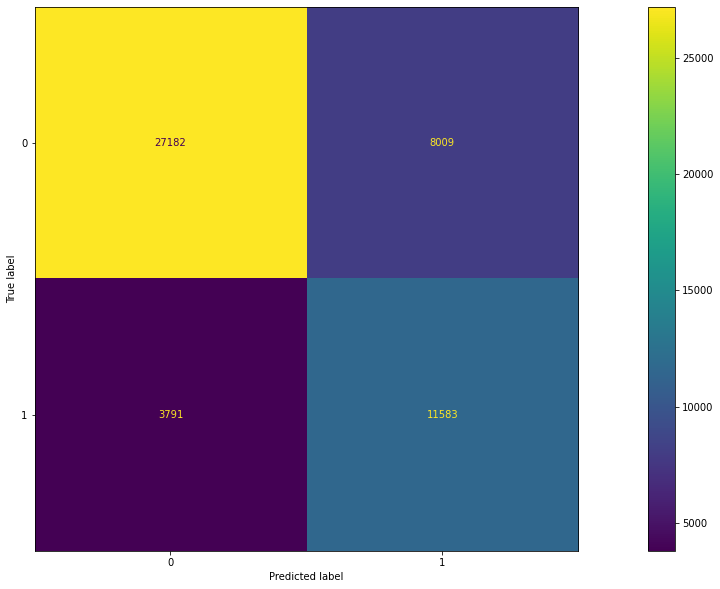

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Classification Report

In [118]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test, target_names=['Alta', 'Obito']))

              precision    recall  f1-score   support

        Alta       0.88      0.77      0.82     35191
       Obito       0.59      0.75      0.66     15374

    accuracy                           0.77     50565
   macro avg       0.73      0.76      0.74     50565
weighted avg       0.79      0.77      0.77     50565



## Coeficientes

In [119]:
coefs = pd.DataFrame(data = {
    'Colunas': X_train_transf.columns,
    'Coeficientes': lr.steps[-1][1].coef_.ravel()
})

In [120]:
coefs_ordenado = coefs.reindex(coefs.Coeficientes.abs().sort_values(ascending = False).index).reset_index(drop=True)

In [121]:
coefs_ordenado.loc[0, :] = ['Intercepto', lr.steps[-1][1].intercept_]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [122]:
coefs_ordenado

,Colunas,Coeficientes
0,Intercepto,-0.633099
1,suporte_vent_Nao-invasivo,-1.764571
2,"idade1_(75.0, 121.0]",1.628466
3,uti,0.988053
4,"idade1_(63.0, 75.0]",0.975864
5,mae_amamenta,-0.794066
6,imunodepre,0.768054
7,mae_vacinada_gripe,-0.686815
8,diagnostico_COVID,0.617501
9,hepatica,0.544170


Aplicar o class_weight = 'balanced' melhora o recall porém diminui a precisão. 

O modelo de regressão logística não teve muita diferença nos resultados quanto a árvore de decisão, porém acredito que a árvore de decisão tem melhor interpretabilidade e é mais fácil de explicar.

Não muda muita coisa eliminar as colunas, o que indica mais ainda que eram inúteis

**Remover os ignorados e nulos facilita muito a explicabilidade da árvore de decisão e da regressão logística, uma vez que cada sintoma, morbidades e outras variáveis tenham apenas 2 categorias, 1 ou 0.**

**Como não há uma alteração significativa da proporção entre 1 e 0 da variável resposta quando se eliminam as linhas, pode-se dizer que é relativamente seguro removê-las.**

**Sua remoção também nos traz uma pista do que precisamos ter no prontuário de um paciente de SRAG**